In [22]:
import constants
cache_folder_name = 'ratio=logreg;loss=squared;method=baseline'
seed = 44

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import autograd.numpy as np
np.random.seed(seed)
import python_utils.python_utils.basic as basic
import python_utils.python_utils.caching as caching
log_folder = '%s/%s' % (constants.cache_folder, cache_folder_name)
caching.init(constants.cache_folder, constants.which_hash, basic.archiver(log_folder))
%load_ext autoreload
%autoreload 2
import matplotlib
matplotlib.use('Agg')

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import display_pretty, display_html
import python_utils.python_utils.basic as basic
import pandas as pd
import pdb
import itertools
import functools
import scipy.stats
import scipy
import cvxopt
import autograd
import autograd.numpy as np
import domain_adapt.domain_adapt.new.fxns as fxns
import domain_adapt.domain_adapt.new.utils as utils
import domain_adapt.domain_adapt.new.optimizers as optimizers
import domain_adapt.domain_adapt.new.constructors as constructors
#import domain_adapt.domain_adapt.SDR_data as data
import domain_adapt_run.domain_adapt_run.notebooks.new.hyperparameter_loss_surface_stratified.run as run
import data.domain_adapt_data.domain_adapt_data.fxns as data

In [24]:
# define data
training_proportion = 0.85
training_sampler = functools.partial(data.kmm_paper_pca_subsample, 10., 5., 0.1)
get_data_f = data.boston_housing
num_data = 1500

In [25]:
#
get_data = functools.partial(data.get_data_helper, training_proportion, training_sampler, get_data_f, num_data)

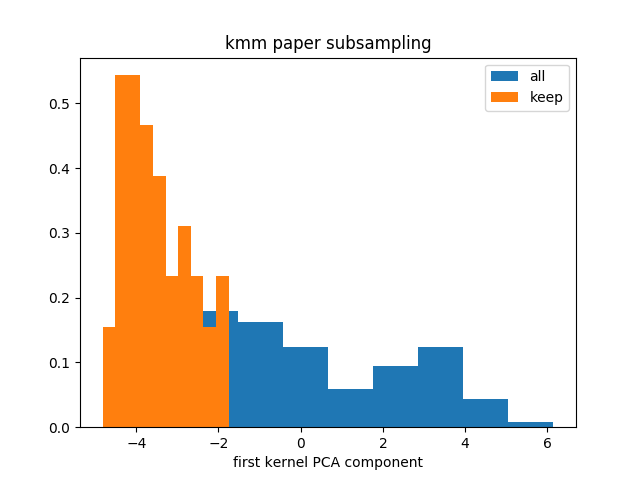

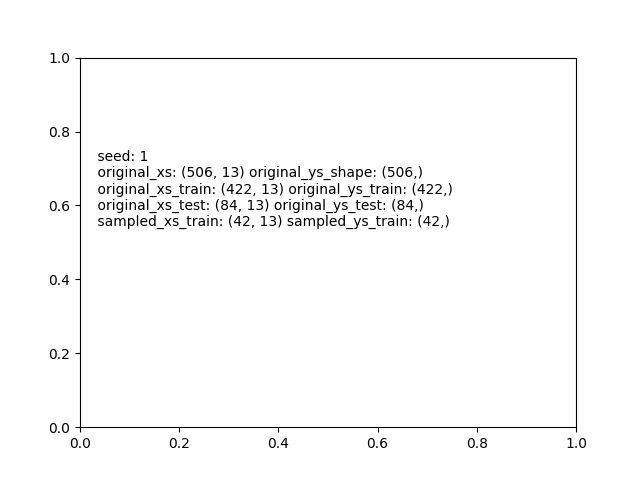

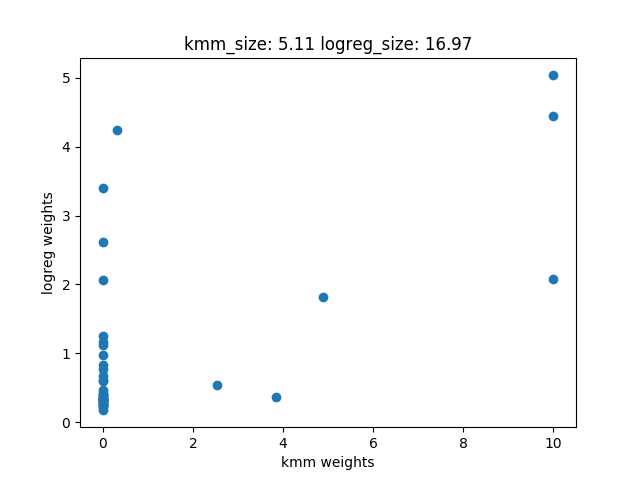

xs_train shape: (42, 13) xs_test_shape (42,)


In [26]:
# test get_data
xs_train, ys_train, xs_test, ys_test = get_data(1)
print 'xs_train shape:', xs_train.shape, 'xs_test_shape', xs_test.shape

In [5]:
# define fitter
num_tries = 1
plot_b_info = constructors.plot_b_info
def get_fitter(c_logreg, c_lsqr, sigma, max_ratio):
    return constructors.baseline_fitter(c_logreg, c_lsqr, sigma, max_ratio=max_ratio, plot_b_info=plot_b_info)

In [6]:
# define hyperparameter search space via an iterator
c_lsqrs = [10,]#100]#,150,500,1000]
c_logregs = [0.1,1.]
sigmas = [0.25,]#5.]#,5.]
max_ratios = [2.,]#5.]
make_tuple = lambda key, vals: [(key,val) for val in vals]
care_hyperparam_tuples = itertools.product(
    )
nocare_hyperparam_tuples = itertools.product(
    make_tuple('c_lsqr',c_lsqrs), 
    make_tuple('c_logreg',c_logregs), 
    make_tuple('sigma',sigmas), 
    make_tuple('max_ratio',max_ratios)
    )

In [7]:
# define mapper
mapper = map

In [8]:
#
num_iterations = 1

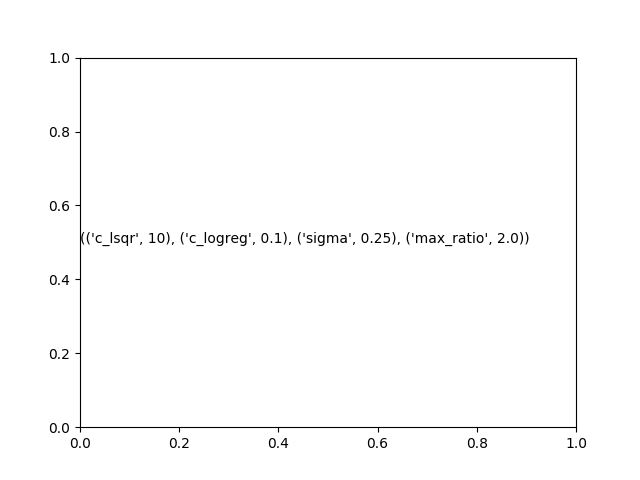

seed: 0
(500, 8) (500,)
(254, 8) (246, 8)


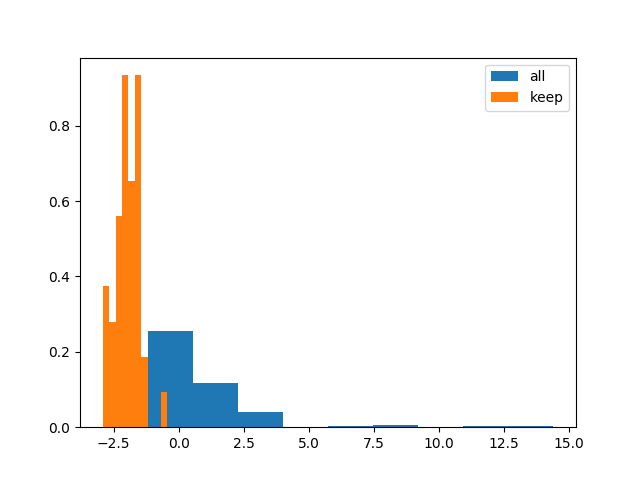

(43, 8) (43,) (246, 8) (246,)


/Users/fultonw/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


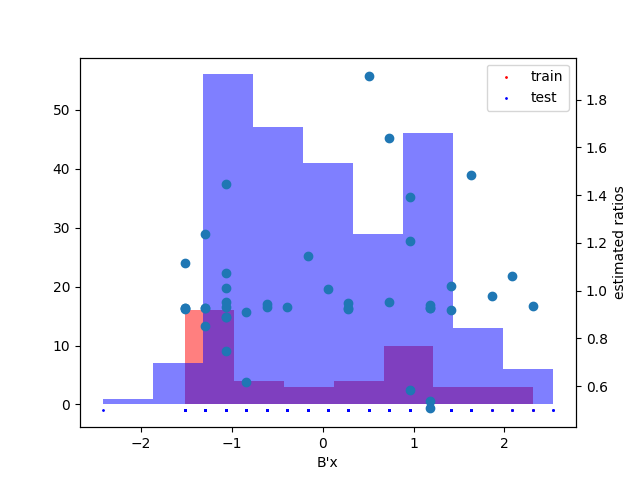

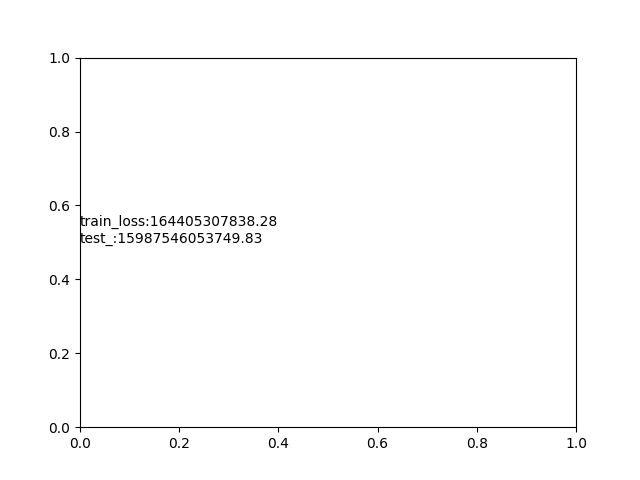

b_norm: 1.0


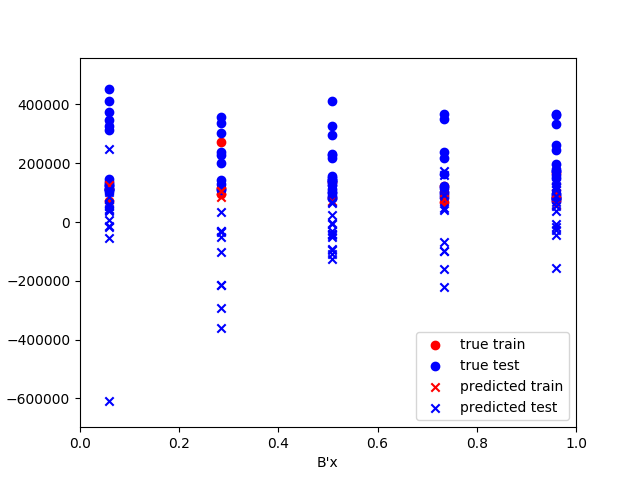

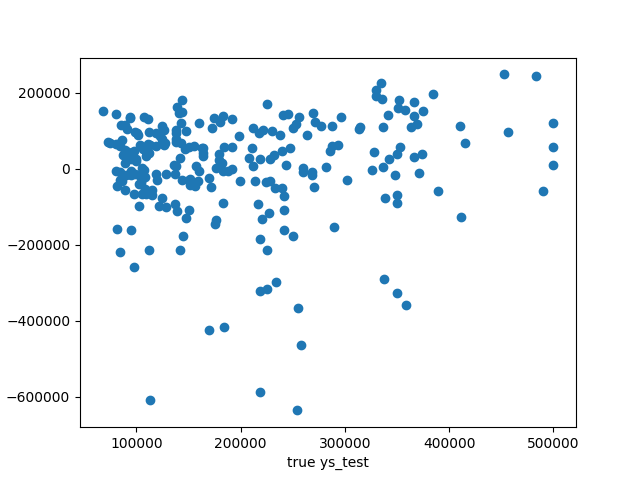

1.59875460537e+13


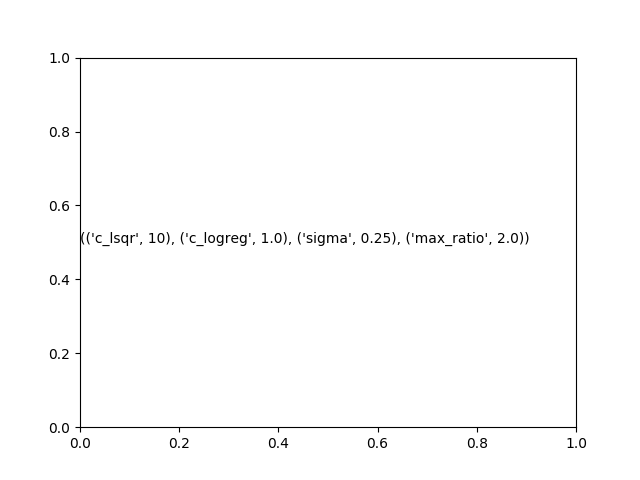

seed: 0
(500, 8) (500,)
(254, 8) (246, 8)


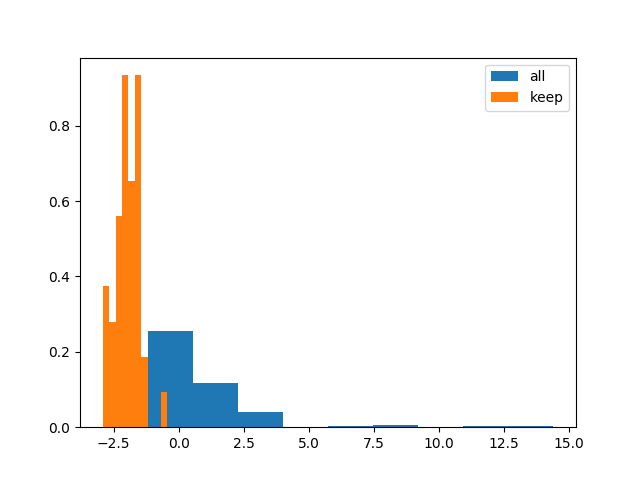

(43, 8) (43,) (246, 8) (246,)


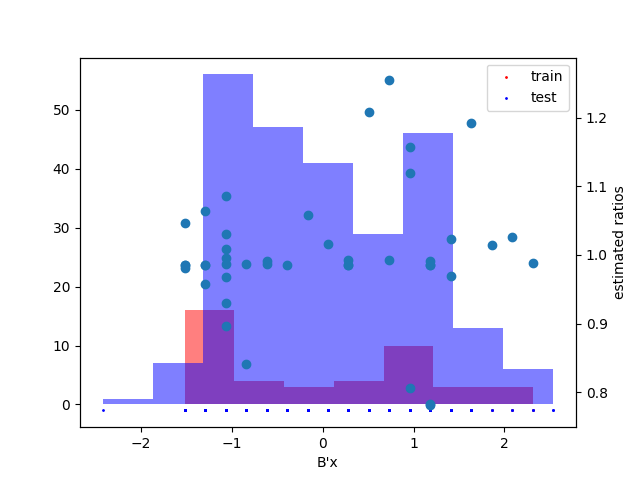

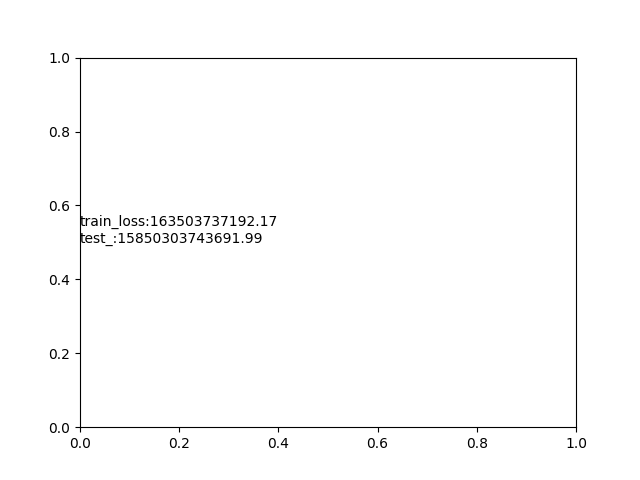

b_norm: 1.0


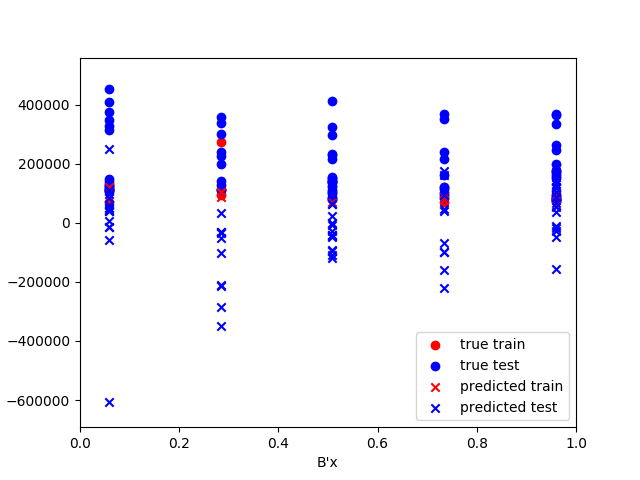

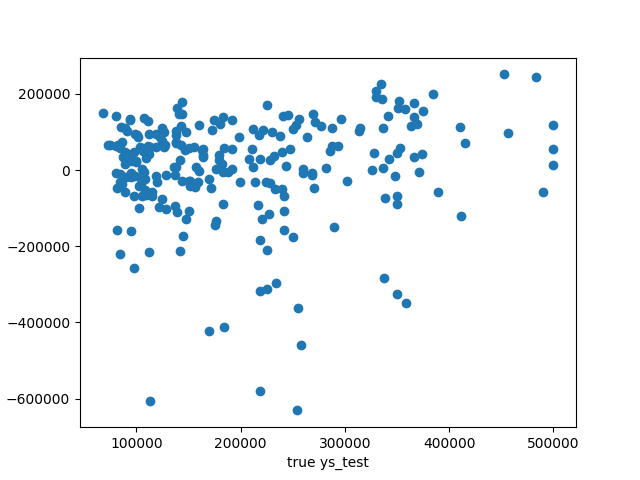

1.58503037437e+13
                    (c_lsqr, 10)                     
                 (c_logreg, 0.1)      (c_logreg, 1.0)
                   (sigma, 0.25)        (sigma, 0.25)
                (max_ratio, 2.0)     (max_ratio, 2.0)
mean_loss           1.598755e+13          1.58503e+13
std_loss                       0                    0
test_losses  [1.59875460537e+13]  [1.58503037437e+13]


(c_lsqr, 10) 
 
 
 
 (c_logreg, 0.1) 
 (c_logreg, 1.0) 
 
 
 
 (sigma, 0.25) 
 (sigma, 0.25) 
 
 
 
 (max_ratio, 2.0) 
 (max_ratio, 2.0) 
 
 
 
 
 mean_loss 
 1.598755e+13 
 1.58503e+13 
 
 
 std_loss 
 0 
 0 
 
 
 test_losses 
 [1.59875460537e+13] 
 [1.58503037437e+13]

In [9]:
# 
run.run(get_data, get_fitter, care_hyperparam_tuples, nocare_hyperparam_tuples, num_iterations, mapper)